Written by Matt Mortimer, started 28 Sep 2021,
matthew.mortimer@anu.edu.au,
Orcid ID: https://orcid.org/0000-0002-8135-9319
Python 3

# Overview
*Background:* Engineer plant nitrate reductase enzyme into perchlorate reductase  
*Aim:* Phylogenetic component of the project aims to generate a plant nitrate reductase enzyme phlyogeny and reconstruct the ancestors  
*Data sources:* 
    Primary - One Thousand Plant Transcriptome TBlastN (default settings), 10k sequences  
                210719_NR_1kp.fasta  
                210719_NR_1kp_details.txt  
            - Phytozome, TBLASTN (e-value threshold -10, word length default, BLOSUM62, allow gaps) 848 sequences 
                211021_NR_phyto_details.txt 
     Secondary - Download of PF00384 family (may not use), 31166 sequences  
                PF00384_full_w_nitrate_reductase.txt  

In [1]:
from Bio import SeqIO
from random import shuffle
from random import seed

import pandas as pd
import seaborn as sns 
import os as os

from modules.annotations import *
from modules.cleaner import *
from modules.analysis import len_distro
from modules.run_blast import blast
from modules.size_filter import *
from modules.utilities import *
from modules.motif_finder import *

from datetime import datetime
DATE = datetime.now().strftime('%y%m%d')

# Nitrate Reductase data processing

# Phytozome processing

In [13]:
# Take the phytozome BLASTP output 
# Add results to the cart, then download with 'Attributes' -> 'Header Information', selection
# 'Gene Name' + 'Organism Name'

# This code will create a csv index file of the sequences and taxonomic info
# Will also generate psudo-Scaffold_ids to match the 1KP dataset

file_n = 'source_data/220818_phyto_nr.fasta'

with open(file_n) as seqs:
    count = 0
    for line in seqs:
        if line.startswith(">"):
            count += 1


# generates the range of unique numbers between 
ids = [i for i in range(1_000_000, 10_000_000)]

# seed to provide reproducibility of shuffle, then shuffles

seed(1)
shuffle(ids)
id_lst = ids[:count]

with open(f'output/220825_phyto_nr_details.txt', 'w+') as ofile:

    ofile.write('Scaffold_id' + '\t' + 'Protein' + '\t' + 'Short_species' + '\t' + 'Phyto_species' +' \t' +  'Sequence' '\n')
    for seq_record in SeqIO.parse(f'source_data/220818_phyto_nr.fasta', 'fasta'):
        count += 1
        sequence = str(seq_record.seq).upper() # Converts sequence to uppercase string
        sequence = sequence.rstrip("*")
        h = seq_record.id.lstrip('>').split('|')
        h1 = h[0]
        h2 = h[1].split('_')[0]
        h3 = h2[0]
        h4 = h2[1:]
        species = h3 + '_' + h4
        scaf = id_lst.pop()

        ofile.write('PHYT_' + str(scaf) + '\t' + h1 + '\t' + species + '\t' + h[1] + '\t' + sequence + '\n')

# # Generate unique psudo-Scaffold_ids 

# # generates the range of unique numbers between 
# ids = [i for i in range(1_000_000, 10_000_000)]

# # seed to provide reproducibility of shuffle, then shuffles

# seed(1)
# shuffle(ids)
# ids = ids[:count]

# phyt_ids = []

# for i in ids:
#     n = 'PHYT_' + str(i)
#     phyt_ids.append(n)

# # Create and index dataframe then export to csv

# phyt_ids_df = pd.DataFrame(phyt_ids, columns = ['Scaffold_id'])

# phyt_ids_df

# phyto_details = pd.read_csv(f'output/220825_phyto_nr_details.txt', sep = '\t')

# phyto_index_df = pd.concat([phyto_details, phyt_ids_df], axis = 1)

# Manually correct with full species names, file named 'output/220825_phyto_nr_master_index_curated.csv'

In [22]:
# Formats the above manually curated csv into one with only relevant fields

phyto_index = pd.read_csv('output/220825_phyto_nr_master_index_curated.csv')
tax_data = pd.read_csv('source_data/220825_species_taxonomy.csv')
tax = tax_data[['Species', 'Description', 'Order']]
phyto_master_index = pd.merge(phyto_index_df, phyto_index, how = 'left', on = 'Phyto_species')

#phyto_master_index.to_csv(f'output/220825_phyto_nr_master_index.csv', index = False)

KeyError: 'Phyto_species'

In [19]:
phyto_df

,Protein,Short_species,Phyto_species,Sequence,Species,Description,Order
0,Acora.04G000700,Acorus_americanus,Aamericanus_v1.1,MWIHHIRGGGLIGGAVLKEISPHRIRIRIRKWIEQIEEERSDPQPI...,Acorus_americanus,Monocots/Commelinids,Acorales
1,Acora.04G000700,Acorus_americanus,Aamericanus_v1.1,MVVIVLALIFCFLVGALVFGPKASKPVARTIQQPPPGKASKLYTKA...,Acorus_americanus,Monocots/Commelinids,Acorales
2,Acora.04G180500,Acorus_americanus,Aamericanus_v1.1,MPTLTKIFSMQEISRHNERDDCWIVIDGKVYDVTSYMDEHPGGDDV...,Acorus_americanus,Monocots/Commelinids,Acorales
3,Acora.08G073800,Acorus_americanus,Aamericanus_v1.1,MESKSDLKVIAFDDVVKHNITHDCWLIIFGKVYDVTEFMSDHPGGE...,Acorus_americanus,Monocots/Commelinids,Acorales
4,Acora.12G105300,Acorus_americanus,Aamericanus_v1.1,MAALLRRLSRAAPTAFTHAFNEQPRSNPSRLFPFGATAIAGGLACL...,Acorus_americanus,Monocots/Commelinids,Acorales
...,...,...,...,...,...,...,...
3878,Zm00001d013257,Zea_mays,Zmays_RefGen_V4,MPTLTKLYSMKEAALHNTPDDCWVVVDGKIYDVTKYLEDHPGGADV...,Zea_mays,Monocots/Commelinids,Poales
3879,Zm00001d018206,Zea_mays,Zmays_RefGen_V4,MAASVERHLAPHPWPANAPPKSFDMFRSGGPGGKRRTGPDSDSEDE...,Zea_mays,Monocots/Commelinids,Poales
3880,Zm00001d017025,Zea_mays,Zmays_RefGen_V4,MSTCVEQPTHSASLDPTAAQRLPYPDLPVDILRRSSVRGSGFVAAA...,Zea_mays,Monocots/Commelinids,Poales
3881,Zm00001d013602,Zea_mays,Zmays_RefGen_V4,MGPRPRVCLFDYESVRQVLFNKSGHFFKDDAHPTILAMLGKGLVLV...,Zea_mays,Monocots/Commelinids,Poales


In [12]:
phyto_df = pd.read_csv(f'output/220825_phyto_nr_master_index.csv', sep = ',')

phyto_df2 = phyto_df

phyto_df2['Header'] = phyto_df['Scaffold_id'] + '|' + phyto_df['Species'] + '|' + phyto_df['Description']+ '|' + phyto_df['Order']

phyto_dict = dict(zip(phyto_df2['Header'], phyto_df2['Sequence']))

with open(f'output/{DATE}_NR_phyto_residueCheck.fasta', 'w') as form: # Creates a fasta file with informative header
                                                                # for use going forward
    for k,v in phyto_dict.items(): 
        form.write('>' + k + '\n' + v +'\n')

print(f'Number of sequences in output/{DATE}_NR_phyto_residueCheck.fasta: {len(phyto_dict)}')

KeyError: 'Scaffold_id'

In [4]:
cleaner(f'output/{DATE}_NR_phyto_residueCheck.fasta', 'phyto')

459 were kept, output was written to 220712_phyto_cleaned.fasta. 20 sequences were dropped and written to output/220712_phyto_cleaner_dropped_seq.fasta
There were 22 instances of duplicate or ambiguous sequences.
output/220712_phyto_cleaned.fasta


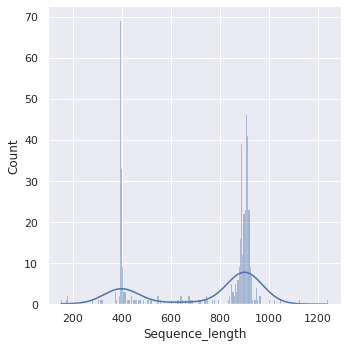

In [5]:
len_distro(f'output/{DATE}_phyto_cleaned.fasta')

In [6]:
size_filter(f'output/{DATE}_phyto_cleaned.fasta', 'phyto', 'greater', 700)

Seqeunces from output/220712_phyto_cleaned.fasta were filtered to those greater than 700 aa
297 filtered sequences were outputed to "output/220712_phyto_size_filt.fasta"


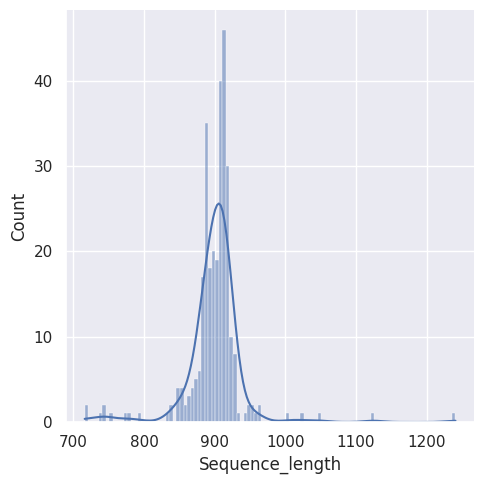

In [53]:
len_distro(f'output/220712_phyto_size_filt.fasta')

[('MA', 235), ('MG', 16), ('MT', 13), ('MS', 9), ('MD', 4), ('ME', 4), ('MH', 4), ('ML', 3), ('MP', 2), ('QA', 1)]
The most common aa at n-terminal is "MA" and its freq. is: 
0.791


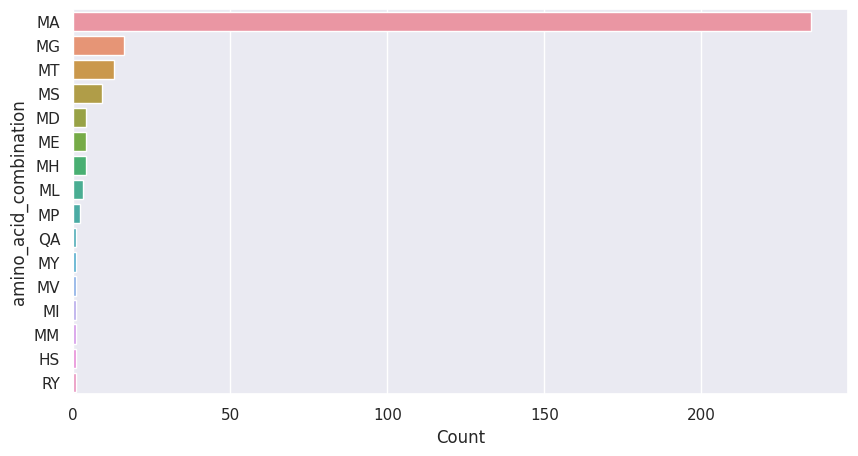

In [9]:
chart(f'output/220712_phyto_size_filt.fasta', 2, 'n', 10, 5)

[('VF', 129), ('IF', 97), ('SF', 18), ('LF', 16), ('QF', 9), ('EF', 8), ('TF', 4), ('VL', 4), ('AF', 2), ('LY', 2)]
The most common aa at c-terminal is "VF" and its freq. is: 
0.434


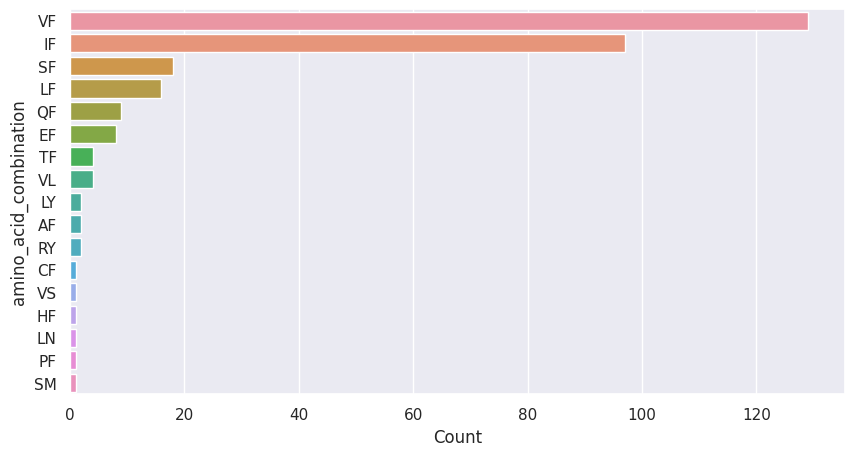

In [11]:
chart(f'output/220712_phyto_size_filt.fasta', 2, 'c', 10, 5)

In [ ]:
#terminal_filter(f'output/220323_phyto_size_filt.fasta', 'phyto', 'n', 'M')

In [ ]:
#terminal_filter(f'output/220323_NR_phyto_n-terminalCodon.fasta', 'phyto', 'c', 'F', 'Y', 'L')

In [ ]:
#chart(f'output/220323_NR_phyto_c-terminalCodon.fasta', 1, 'c', 10, 5)

# 1kp processing

In [12]:
# Format details file, create master index
details = pd.read_csv('source_data/211014_NR_1kp_details_formatted.csv', sep = ',')
species_1kp = pd.read_csv('source_data/211020_species_taxonomy.csv', sep = ',')
NR_1kp_index = pd.merge(details, species_1kp, how = 'inner', on='Onekp_index_id') # Merges dataframes
NR_1kp_index['Scaffold_id'] = NR_1kp_index['Onekp_index_id'] + '_' + NR_1kp_index['Seq_id'].astype(str) # Creates a new column

temp_dict = {}

for seq_record in SeqIO.parse('source_data/210719_NR_1kp.fasta', 'fasta'):
    sequence = str(seq_record.seq).upper() # Converts sequence to uppercase string
    temp_dict[seq_record.id] = sequence # Adds to dict with header as key and sequence as value

with open('output/temp.fasta', 'w') as filt: # Splits header and takes relevant elements, writes a temp fasta file
    for k,v in temp_dict.items(): 

        header = k.split('|')
        h = header[2]
        h2 = h.split('_')
        h3 = h2[0]
        h4 = h2[2]
        filt.write('>' + h3 + '_' + h4 + '\n' + v + '\n')

onekp_dict = {}

for seq_record in SeqIO.parse('output/temp.fasta', 'fasta'):
    sequence = str(seq_record.seq).upper() # Converts sequence to uppercase string
    onekp_dict[seq_record.id] = sequence # Adds to dict with header as key and sequence as value

seq_df = pd.DataFrame.from_dict(onekp_dict, orient = 'index')
seq_df = seq_df.reset_index()
seq_df.columns = ['Scaffold_id', 'Sequence']

NR_1kp_master_index = pd.merge(NR_1kp_index, seq_df, how = 'left', on = 'Scaffold_id')

NR_1kp_master_index.to_csv(f'output/{date}_NR_1kp_master_index.txt', sep = '\t', index = False)
os.remove('output/temp.fasta')

# Make a fasta file from the master index with the Scaffold_id, Species, and Tax_1 as the header
onekp_df = pd.read_csv(f'output/{DATE}_NR_1kp_master_index.txt', sep = '\t')

onekp_df2 = onekp_df

onekp_df2['Header'] = onekp_df['Scaffold_id'] + '|' + onekp_df['Species'] + '|' + onekp_df['Description']+ '|' + onekp_df['Order']

onekp_dict = dict(zip(onekp_df2['Header'], onekp_df2['Sequence']))

with open(f'output/{DATE}_NR_1kp_formatted.fasta', 'w') as form: # Creates a fasta file with informative header
                                                                # for use going forward
    for k,v in onekp_dict.items(): 
        form.write('>' + k + '\n' + v +'\n')


# Function list
Run these for to execute the pipeline

In [13]:
cleaner(f'output/{DATE}_NR_1kp_formatted.fasta', '1kp')

6482 were kept, output was written to 220712_1kp_cleaned.fasta. 206 sequences were dropped and written to output/220712_1kp_cleaner_dropped_seq.fasta
There were 229 instances of duplicate or ambiguous sequences.
output/220712_1kp_cleaned.fasta


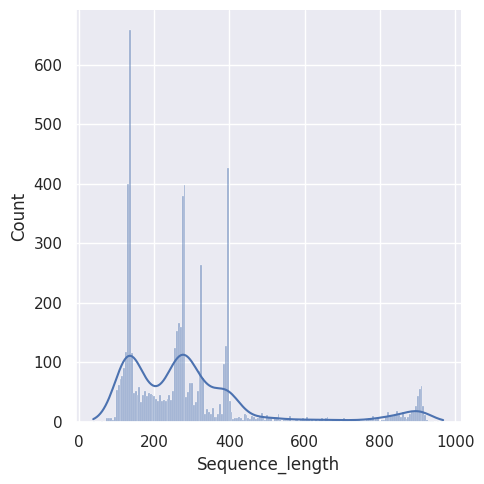

In [14]:
len_distro(f'output/{DATE}_1kp_cleaned.fasta')

In [15]:
size_filter(f'output/{DATE}_1kp_cleaned.fasta', '1kp', 'greater', 700)

Seqeunces from output/220712_1kp_cleaned.fasta were filtered to those greater than 700 aa
513 filtered sequences were outputed to "output/220712_1kp_size_filt.fasta"


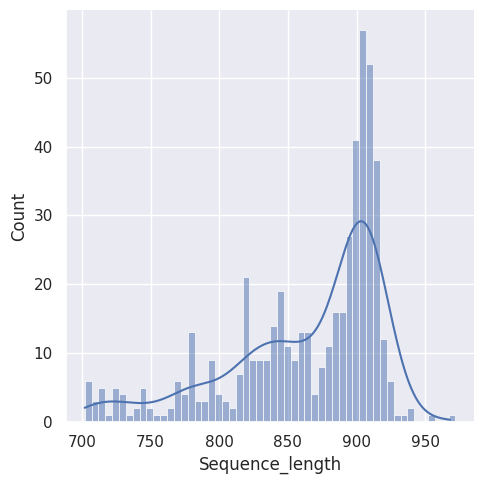

In [16]:
len_distro(f'output/{DATE}_1kp_size_filt.fasta')

[('MA', 254), ('VD', 31), ('EE', 15), ('DD', 12), ('VT', 10), ('DE', 9), ('DP', 8), ('ED', 6), ('RP', 6), ('VM', 5)]
The most common aa at n-terminal is "MA" and its freq. is: 
0.495


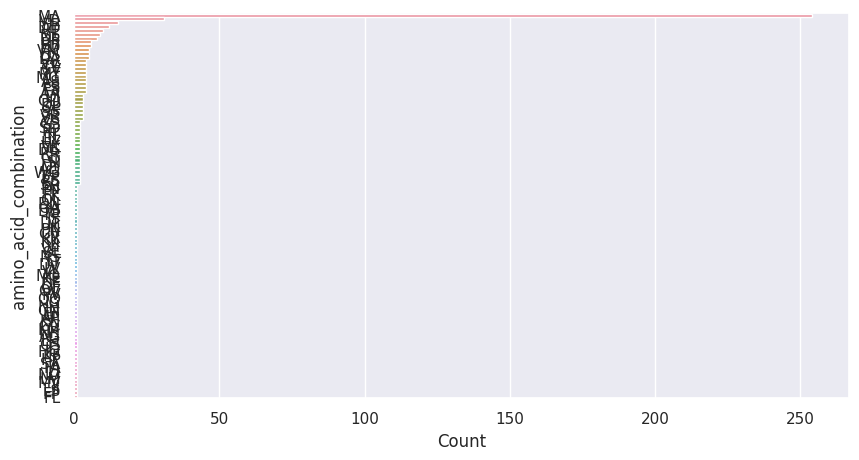

In [17]:
chart(f'output/{DATE}_1kp_size_filt.fasta', 2, 'n', 10, 5)

[('VF', 230), ('IF', 57), ('QF', 44), ('YD', 35), ('LF', 28), ('EF', 18), ('SF', 17), ('GY', 16), ('TF', 10), ('SL', 5)]
The most common aa at c-terminal is "VF" and its freq. is: 
0.448


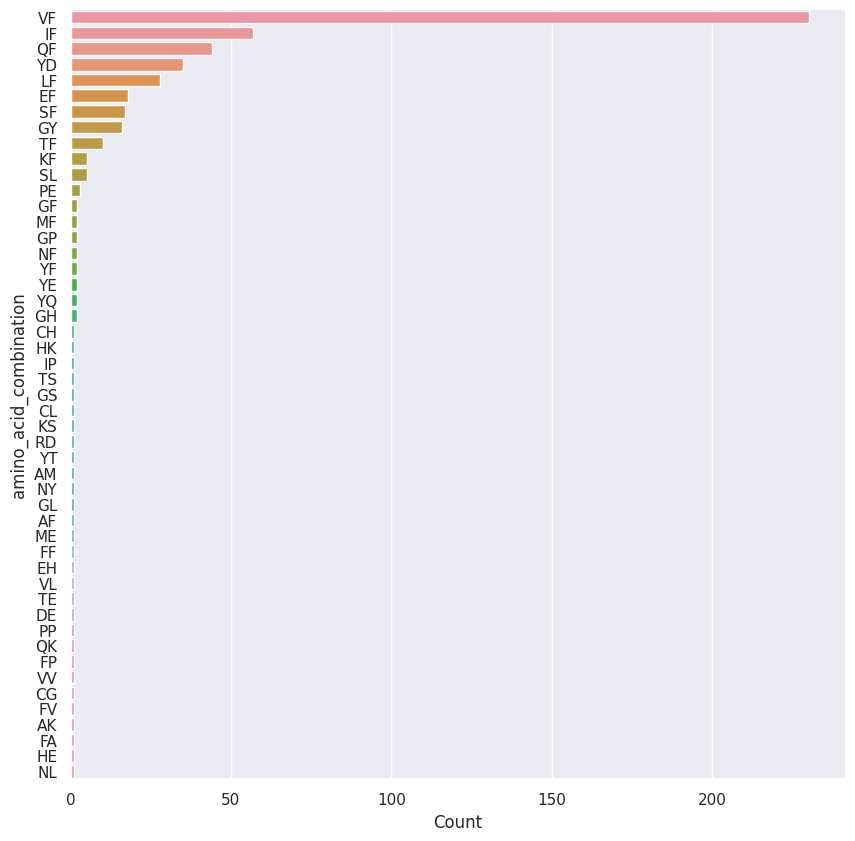

In [20]:
chart(f'output/{DATE}_1kp_size_filt.fasta', 2, 'c', 10, 10)

In [ ]:
#terminal_filter(f'output/220323_1kp_size_filt.fasta', '1kp', 'n', 'M')

In [ ]:
#terminal_filter(f'output/220323_NR_1kp_n-terminalCodon.fasta', '1kp', 'c', 'F', 'Y', 'L')

In [ ]:
#chart(f'output/220323_NR_1kp_c-terminalCodon.fasta', 1, 'c', 10, 5)

# Merge the fasta files from both data sources

When merging I need to make sure that if the species is found in phytozome that I remove the 1kp equiv

In [21]:
with open(f'output/{DATE}_NR_dataset.fasta', 'a+') as dataset:
    with open(f'output/{DATE}_1kp_size_filt.fasta', 'r') as onekp:
    #with open(f'output/{DATE}_NR_1kp_c-terminalCodon.fasta', 'r') as onekp:
        for line in onekp:
            dataset.write(line)
    with open(f'output/{DATE}_phyto_cleaned.fasta', 'r') as phyto:
    #with open(f'output/{DATE}_NR_phyto_c-terminalCodon.fasta', 'r') as phyto:
        for line in phyto:
            dataset.write(line)   

In [22]:
cleaner(f'output/{DATE}_NR_dataset.fasta', 'phyto_1kp')

972 were kept, output was written to 220712_phyto_1kp_cleaned.fasta. 0 sequences were dropped and written to output/220712_phyto_1kp_cleaner_dropped_seq.fasta
There were 0 instances of duplicate or ambiguous sequences.
output/220712_phyto_1kp_cleaned.fasta


No sequences were dropped from above so will use 211021_NR_dataset.fasta as the dataset

# Merge the index files

In [4]:
onekp = pd.read_csv("output/220712_NR_1kp_master_index.txt", sep = "\t")
phyto = pd.read_csv("output/211021_NR_phyto_master_index.csv")

onekp['Data_source'] = "1kp"
phyto['Data_source'] = "phyto"

In [5]:
onekp.head()

,Onekp_index_id,Seq_id,Subject Scientific Name,Subject Taxonomy ID,Percentage of identical matches,Alignment length,Number of mismatches,Number of gap openings,Start of alignment in query,End of alignment in query,...,Total number of gap,Expect value,Bit score,Phyto_species,Species,Description,Order,Scaffold_id,Sequence,Data_source
0,DLJZ,2059039,Solanum ptychanthum,45838,97.149,912,25,1,1,911,...,1,0,1854,NaN,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2059039,MAASVENRQFSHLEPGLSGVGRTFKPRSDSPVRGCNFPPSSKHELP...,1kp
1,DLJZ,2057353,Solanum ptychanthum,45838,31.552,393,225,12,109,481,...,44,0,206,NaN,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2057353,MPGIKGPSDYSREPPRHPCLKINSKEPFNAEPTRSALISSYVTPVD...,1kp
2,DLJZ,2054501,Solanum ptychanthum,45838,40.467,257,127,8,649,902,...,26,0,190,NaN,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2054501,MEFLERPDAQLIIGVAVAAVAVGATAYFYFSSKKSKVCLNPEEFRA...,1kp
3,DLJZ,2002023,Solanum ptychanthum,45838,34.752,282,144,7,615,890,...,40,0,154,NaN,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2002023,MAAFLRKLAKAAPVAFSEAFRGDSKSNFADPRFPFGAIAAVAGCVS...,1kp
4,DLJZ,2050677,Solanum ptychanthum,45838,46.250,80,42,1,532,610,...,1,0,84,NaN,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2050677,MPTLTKLFTMEEAAQHNTKDDCWVVIDGKVYDVSSYLDEHPGGDDV...,1kp


In [6]:
phyto.head()

,Protein,Short_species,Species,Phyto_species,Sequence,Scaffold_id,Description,Order,Data_source
0,Acora.12G059500,A_americanus,Acorus_americanus,Aamericanus_v1.1,MLGVRGPSDYTHEPPRHPCLRINAKEPFNAEPPRDALVSSFITPVD...,PHYT_3431815,Monocots/Commelinids,Acorales,phyto
1,Acora.11G193600,A_americanus,Acorus_americanus,Aamericanus_v1.1,MAASVDKRQFNHLEPPFTIFPSPPPQTFKDSSDSDSDSDPDHHEWK...,PHYT_2362616,Monocots/Commelinids,Acorales,phyto
2,Acora.03G182000,A_americanus,Acorus_americanus,Aamericanus_v1.1,MPGIRGPSDYSREPPRHPILQINAKAPFNAEPPRGALVSSFITPVD...,PHYT_3832029,Monocots/Commelinids,Acorales,phyto
3,Aqcoe6G016900,A_coerulea,Aquilegia_coerulea,Acoerulea_v3.1,MAASVQTRQFNGTDSQFRGGGCNFISTLEKKPVIQQKDYYYSSSED...,PHYT_1302463,Eudicots,Ranunculales,phyto
4,Aqcoe4G284100,A_coerulea,Aquilegia_coerulea,Acoerulea_v3.1,MAASVRSRQFNGTDSPFRGGGGGGVGGNFISTLPTKPPKDCYYSST...,PHYT_2618647,Eudicots,Ranunculales,phyto


In [7]:
# Print the lists of unique species and classifications in each of onekp and phyto datasets

onekp = onekp.loc[onekp["Description"] != "Outgroup"]

onekp_species = onekp['Species'].unique()
phyto_species = phyto['Species'].unique()

onekp_species = set(onekp_species)
phyto_species = set(phyto_species)

unique_sp_onekp = onekp_species - phyto_species
unique_sp_phyto = phyto_species - onekp_species

print(f"Species unique to 1kp dataset:\n{unique_sp_onekp}\n")
print(f"Species unique to phyto dataset:\n{unique_sp_phyto}\n")

onekp_tax = onekp['Description'].unique()
phyto_tax = phyto['Description'].unique()

onekp_tax = set(onekp_tax)
phyto_tax = set(phyto_tax)

unique_cl_onekp = onekp_tax - phyto_tax
unique_cl_phyto = phyto_tax - onekp_tax

print("\n")
print(f"Classificaitons unique to 1kp dataset:\n{unique_cl_onekp}\n")
print(f"Classificaitons unique to phyto dataset:\n{unique_cl_phyto}\n")


Species unique to 1kp dataset:
{'Anemia_tomentosa', 'Asplenium_platyneuron', 'Catharanthus_roseus', 'Alsophila_pinulosa', 'Serenoa_repens', 'Bacopa_caroliniana', 'Cyanastrum_cordifolium', 'Ipomoea_coccinea', 'Thalictrum_thalictroides', 'Illicium_floridanum', 'Cercis_canadensis', 'Aristida_stricta', 'Polanisia_trachysperma', 'Cryptogramma_acrostichoides', 'Sabal_bermudana', 'Cochlearia_officinalis', 'Ilex_sp.', 'Ludovia_sp.', 'Cyperus_papyrus', 'Salix_dasyclados', 'Scaevola_mossambicensis', 'Polypremum_procumbens', 'Marattia_attenuata', 'Pistia_stratiotes', 'Paulownia_fargesii', 'Galium_boreale', 'Plantago_maritima', 'Larrea_tridentata', 'Francoa_appendiculata', 'Quillaja_saponaria', 'Acacia_argyrophylla', 'Holarrhena_pubescens', 'Isoetes_sp.', 'Santalum_acuminatum', 'Tropaeolum_peregrinum', 'Peltoboykinia_watanabei', 'Pinus_ponderosa', 'unknown', 'Torreya_taxifolia', 'Ajuga_reptans', 'Oncidium_sphacelatum', 'Peperomia_fraseri', 'Myrica_cerifera', 'Racomitrium_elongatum', 'Glycyrrhiza_l

In [8]:
joint = onekp.merge(phyto, on=['Species', 'Order', 'Description', 'Sequence', 'Scaffold_id', 'Data_source'], how='outer')

In [9]:
joint.to_csv(f"output/{DATE}_master_index.csv", index = False)

In [11]:
# Create a fasta file from the master_index.csv

master_df = pd.read_csv(f'output/220712_master_index.csv')

temp_df = master_df

temp_df['Header'] = master_df['Scaffold_id'] + '|' + master_df['Species'] + '|' + master_df['Description'] + '|' + master_df['Order']+ '|' + master_df['Data_source'] 

master_dict = dict(zip(temp_df['Header'], temp_df['Sequence']))

with open(f'output/{DATE}_phyto_1kp_master.fasta', 'w') as form: # Creates a fasta file with informative header
                                                                # for use going forward
    for k,v in master_dict.items(): 
        form.write('>' + k + '\n' + v +'\n')

In [12]:
temp_df

,Onekp_index_id,Seq_id,Subject Scientific Name,Subject Taxonomy ID,Percentage of identical matches,Alignment length,Number of mismatches,Number of gap openings,Start of alignment in query,End of alignment in query,...,Species,Description,Order,Scaffold_id,Sequence,Data_source,Protein,Short_species,Phyto_species_y,Header
0,DLJZ,2059039.0,Solanum ptychanthum,45838.0,97.149,912.0,25.0,1.0,1.0,911.0,...,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2059039,MAASVENRQFSHLEPGLSGVGRTFKPRSDSPVRGCNFPPSSKHELP...,1kp,NaN,NaN,NaN,DLJZ_2059039|Solanum_ptychanthum|Core_eudicots...
1,DLJZ,2057353.0,Solanum ptychanthum,45838.0,31.552,393.0,225.0,12.0,109.0,481.0,...,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2057353,MPGIKGPSDYSREPPRHPCLKINSKEPFNAEPTRSALISSYVTPVD...,1kp,NaN,NaN,NaN,DLJZ_2057353|Solanum_ptychanthum|Core_eudicots...
2,DLJZ,2054501.0,Solanum ptychanthum,45838.0,40.467,257.0,127.0,8.0,649.0,902.0,...,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2054501,MEFLERPDAQLIIGVAVAAVAVGATAYFYFSSKKSKVCLNPEEFRA...,1kp,NaN,NaN,NaN,DLJZ_2054501|Solanum_ptychanthum|Core_eudicots...
3,DLJZ,2002023.0,Solanum ptychanthum,45838.0,34.752,282.0,144.0,7.0,615.0,890.0,...,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2002023,MAAFLRKLAKAAPVAFSEAFRGDSKSNFADPRFPFGAIAAVAGCVS...,1kp,NaN,NaN,NaN,DLJZ_2002023|Solanum_ptychanthum|Core_eudicots...
4,DLJZ,2050677.0,Solanum ptychanthum,45838.0,46.250,80.0,42.0,1.0,532.0,610.0,...,Solanum_ptychanthum,Core_eudicots/Asterids,Solanales,DLJZ_2050677,MPTLTKLFTMEEAAQHNTKDDCWVVIDGKVYDVSSYLDEHPGGDDV...,1kp,NaN,NaN,NaN,DLJZ_2050677|Solanum_ptychanthum|Core_eudicots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zea_mays,Monocots/Commelinids,Poales,PHYT_2731697,MAAVEPRQFGRLEPARVGAYPPPPSHIPRRADSPARGCGFPPLVSP...,phyto,Zm00001d031769,Z_mays,Zmays_RefGen_V4,PHYT_2731697|Zea_mays|Monocots/Commelinids|Poa...
7038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zea_mays,Monocots/Commelinids,Poales,PHYT_6862052,MAASVERHLAPHPWPANAPPKSFDMFRTGSDSDSEDEDSIPAVDWR...,phyto,Zm00001d052139,Z_mays,Zmays_RefGen_V4,PHYT_6862052|Zea_mays|Monocots/Commelinids|Poa...
7039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zea_mays,Monocots/Commelinids,Poales,PHYT_2065661,MAAVEPRQFGRLEPGSSPVRVATNGAKAYPPPASHLPRRADSPVRG...,phyto,Zm00001d049995,Z_mays,Zmays_RefGen_V4,PHYT_2065661|Zea_mays|Monocots/Commelinids|Poa...
7040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zea_mays,Monocots/Commelinids,Poales,PHYT_7245880,MAASVERHLAPHPWPANAPPKSFDMFRSGGPGGKRRTGPDSDSEDE...,phyto,Zm00001d018206,Z_mays,Zmays_RefGen_V4,PHYT_7245880|Zea_mays|Monocots/Commelinids|Poa...


In [21]:
# Print the A. thaliana headers
temp_df2 = temp_df.loc[temp_df['Species'] == "Arabidopsis_thaliana"]
temp_df2 = temp_df2['Header']
temp_df2.iloc[0]

'PHYT_6642896|Arabidopsis_thaliana|Core_eudicots/Rosids|Brassicales|phyto'

In [22]:
temp_df2.iloc[1]

'PHYT_1421262|Arabidopsis_thaliana|Core_eudicots/Rosids|Brassicales|phyto'

In [23]:
temp_df2.iloc[2]

'PHYT_5350191|Arabidopsis_thaliana|Core_eudicots/Rosids|Brassicales|phyto'

# Remove overly similar sequences

In [4]:
# Run T-COFFEE reformat utility to remove overly similary sequences, keeping the A. thaliana ones
os.system(f"t_coffee -other_pg seq_reformat -in output/{DATE}_phyto_1kp_master.fasta -action +trim _seq_%80_fNAME Arabidopsis_thaliana -output fasta_seq >output/BLAST/{DATE}_sequences_for_blast.fasta")


!		[Similarity Matrix Computation: ][TOT=24728028][  2 %][REMAINING TIME: 24794 sec.]

# Create SSN using BLAST

In [ ]:
# Change fasta headers to only have Scaffold_id for blast network generation

with open(f"output/{DATE}_sequences_for_SSN.fasta", "w") as blast_fasta:

    for seq_record in SeqIO.parse(f"output/BLAST/{DATE}_sequences_for_blast.fasta", "fasta"):
        seq_id = seq_record.id
        id_lst = seq_id.split("|")
        scaffold_id = id_lst[0]

        sequence = seq_record.seq

        blast_fasta.write(f">{scaffold_id}\n")
        blast_fasta.write(f"{sequence}\n")

In [2]:
# Run a all v all BLAST search using a blast function 
# BLAST must be installed locally.
# Takes 3 arguments, a fasta file, the project name, and the e-value threshold.

# Just a clear way of laying out the function arguments

in_fasta = f'output/220712_sequences_for_SSN.fasta' # Use the last outputted 
                                                        # fasta file from above
# path = '/usr/lib/ncbi-blast-2.12.0+/bin'

# Actual BLAST function, using default E_value_threshold="10e-10", cpus="2" (adjust 
# these arguments as required)

blast(in_fasta, '10e-10', cpus='24')



Building a new DB, current time: 07/13/2022 08:56:19
New DB name:   /home/mattm/projects/PR/output/BLAST/220713_dataset_db
New DB title:  output/220712_sequences_for_SSN.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /home/mattm/projects/PR/output/BLAST/220713_dataset_db
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 6711 sequences in 0.0852249 seconds.


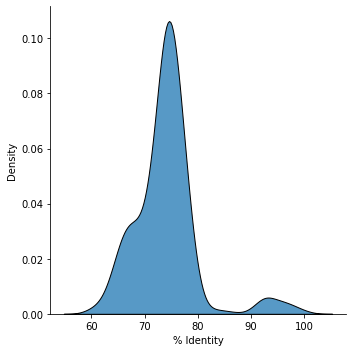

In [ ]:
blast_table = pd.read_csv("output/BLAST/220323_dataset_network_10e-10.csv")

per_id = blast_table[["Query", '% Identity']]
Athaliana = per_id.loc[per_id['Query'] == 'PHYT_1421262'] 

sns.displot(Athaliana, x = '% Identity', kind = 'kde', multiple = 'stack')

In [ ]:
# Run a all v all BLAST search using a blast function 
# BLAST must be installed locally.
# Takes 3 arguments, a fasta file, the project name, and the e-value threshold.

# Just a clear way of laying out the function arguments

blast_path = '/Users/u6280883/Library/ncbi-blast-2.12.0+/bin/' # Only needed if blast hasn't been 
                                                      # added to the PATH environment, must 
                                                      # end in '/'
in_fasta = f'output/220323_sequences_to_blast.fasta' # Use the last outputted 
                                                        # fasta file from above
# path = '/usr/lib/ncbi-blast-2.12.0+/bin'

# Actual BLAST function, using default E_value_threshold="10e-10", cpus="2" (adjust 
# these arguments as required)

blast(in_fasta, '10e-10', cpus='6', path=blast_path)



Building a new DB, current time: 03/23/2022 15:50:33
New DB name:   /Users/u6280883/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Documents/Main/Uni/2.PhD/3.NR/NR_python_pipeline/output/BLAST/220323_dataset_db
New DB title:  output/220323_sequences_to_blast.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /Users/u6280883/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Documents/Main/Uni/2.PhD/3.NR/NR_python_pipeline/output/BLAST/220323_dataset_db
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 541 sequences in 0.0245349 seconds.


Run time: 0:02:30 hh:mm:ss
Network file output/BLAST/220323_dataset_network_10e-10.csv generated


# Run Evolocity